In [1]:
# Import libraries
from os import listdir
from os.path import isfile, join

from PIL import Image
import os, sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Form pipeline from list of directories
from pathlib import Path

snapshots_path = '_data/_snapshots'
snapshot_path = Path(snapshots_path)

# Create list of root shapshot directories
test_train_dir = os.listdir(snapshot_path)
test_train_dir = sorted(test_train_dir[:])
test_train_dir = test_train_dir[1:]
test_train_dir

['_test', '_train']

In [161]:
# Create 2 lists of name directories in _train and _test
train_names_path = snapshots_path + '/_train'
train_names = Path(train_names_path)
train_names_dir = os.listdir(train_names)
train_names_dir = sorted(train_names_dir[:])
train_names_dir = train_names_dir[1:]

test_names_path = snapshots_path + '/_test'
test_names = Path(test_names_path)
test_names_dir = os.listdir(test_names)
test_names_dir = sorted(test_names_dir[:])
test_names_dir = test_names_dir[1:]

print(train_names_dir)
print(test_names_dir)

['Callum', 'Erin', 'Kathi', 'Lea', 'Lydia', 'Olivia', 'Sarah']
['Alex', 'Amber', 'Cosi', 'Kai', 'Karo', 'Liat']


In [162]:
# Create list of NO TOUCH (0) image file paths for all directories in _train
train_names0 = []
for directory in train_names_dir:
    mypath = snapshots_path + '/_train/' + directory + '/0'

    snapshots = [directory + '/0/' + f for f in listdir(mypath) if isfile(join(mypath, f)) and (f[-3:] == 'png' or f[-4:] == 'jpeg')]
    train_names0 += snapshots
len(train_names0)

2090

In [163]:
# Create list of TOUCH (1) image file paths for all directories in _train
train_names1 = []
for directory in train_names_dir:
    mypath = snapshots_path + '/_train/' + directory + '/1'

    snapshots = [directory + '/1/' + f for f in listdir(mypath) if isfile(join(mypath, f)) and (f[-3:] == 'png' or f[-4:] == 'jpeg')]
    train_names1 += snapshots
len(train_names1)

3012

In [164]:
# Create list of NO TOUCH (0) image file paths for all directories in _test
test_names0 = []
for directory in test_names_dir:
    mypath = snapshots_path + '/_test/' + directory + '/0'

    snapshots = [directory + '/0/' + f for f in listdir(mypath) if isfile(join(mypath, f)) and (f[-3:] == 'png' or f[-4:] == 'jpeg')]
    test_names0 += snapshots
len(test_names0)

1154

In [165]:
# Create list of TOUCH (1) image file paths for all directories in _test
test_names1 = []
for directory in test_names_dir:
    mypath = snapshots_path + '/_test/' + directory + '/1'

    snapshots = [directory + '/1/' + f for f in listdir(mypath) if isfile(join(mypath, f)) and (f[-3:] == 'png' or f[-4:] == 'jpeg')]
    test_names1 += snapshots
len(test_names1)

255

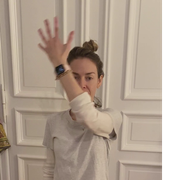

In [166]:
# Attempt cropping and resizing of NO TOUCH (0) in _train directory
path = snapshots_path + '/_train/' + train_names0[200]
image = Image.open(path)
box = (0, 0, 1200, 1200)
cropped_image = image.crop(box)
resized_image = cropped_image.resize((180,180), Image.ANTIALIAS)
resized_image

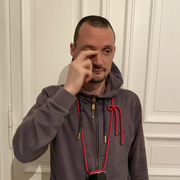

In [167]:
# Attempt cropping and resizing of TOUCH (1) in _train directory
path = snapshots_path + '/_train/' + train_names1[200]
image = Image.open(path)
box = (100, 300, 2800, 3000)
cropped_image = image.crop(box)
resized_image = cropped_image.resize((180,180), Image.ANTIALIAS)
resized_image

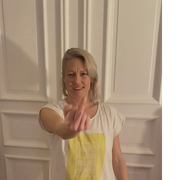

In [168]:
# Attempt cropping and resizing of NO TOUCH (0) in _test directory
path = snapshots_path + '/_test/' + test_names0[0]
image = Image.open(path)
box = (0, 0, 1200, 1200)
cropped_image = image.crop(box)
resized_image = cropped_image.resize((180,180), Image.ANTIALIAS)
resized_image

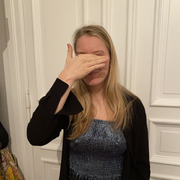

In [169]:
# Attempt cropping and resizing of TOUCH (1) in _test directory
path = snapshots_path + '/_test/' + test_names1[200]
image = Image.open(path)
box = (100, 300, 2800, 3000)
cropped_image = image.crop(box)
resized_image = cropped_image.resize((180,180), Image.ANTIALIAS)
resized_image

In [111]:
# Crop _train png (0) images to squares of: (0, 0, 1200, 1200)
# Resize images to: 180 x 180
path = snapshots_path + '/_train/'
box = (0, 0, 1200, 1200)

for item in train_names0:
    # Make person directory if not there
    parent_dir = '_data/_resized/_train/'
    first_dir = item.split('/')
    new_dir = first_dir[0] + '/0/'
    new_path = os.path.join(parent_dir, new_dir)
    if not os.path.exists(new_path):
        os.makedirs(new_path)
    
    # Crop, Resize and Save
    image = Image.open(path+item)
    cropped_image = image.crop(box)
    f, e = os.path.splitext(path+item)
    cropped_image = image.crop(box)
    resized_image = cropped_image.resize((180,180), Image.ANTIALIAS)
    resized_image.save('_data/_resized/_train/' + item[:-4] + '.png', 'PNG', quality=90)

In [68]:
# Crop _train jpeg (1) images to squares of: (100, 300, 2800, 3000)
# Resize images to: 180 x 180 and save as png
path = snapshots_path + '/_train/'
box = (100, 300, 2800, 3000)

for item in train_names1:
    # Make person directory if not there
    parent_dir = '_data/_resized/_train/'
    first_dir = item.split('/')
    new_dir = first_dir[0] + '/1/'
    new_path = os.path.join(parent_dir, new_dir)
    if not os.path.exists(new_path):
        os.makedirs(new_path)
    
    # Crop, Resize and Save
    image = Image.open(path+item)
    cropped_image = image.crop(box)
    f, e = os.path.splitext(path+item)
    cropped_image = image.crop(box)
    resized_image = cropped_image.resize((180,180), Image.ANTIALIAS)
    resized_image.save('_data/_resized/_train/' + item[:-5] + '.png', 'PNG', quality=90)

In [170]:
# Crop _test png (0) images to squares of: (0, 0, 1200, 1200)
# Resize images to: 180 x 180
path = snapshots_path + '/_test/'
box = (0, 0, 1200, 1200)

for item in test_names0:
    # Make person directory if not there
    parent_dir = '_data/_resized/_test/'
    first_dir = item.split('/')
    new_dir = first_dir[0] + '/0/'
    new_path = os.path.join(parent_dir, new_dir)
    if not os.path.exists(new_path):
        os.makedirs(new_path)
    
    # Crop, Resize and Save
    image = Image.open(path+item)
    cropped_image = image.crop(box)
    f, e = os.path.splitext(path+item)
    cropped_image = image.crop(box)
    resized_image = cropped_image.resize((180,180), Image.ANTIALIAS)
    resized_image.save('_data/_resized/_test/' + item[:-4] + '.png', 'PNG', quality=90)


In [171]:
# Crop _test jpeg (1) images to squares of: (100, 300, 2800, 3000)
# Resize images to: 180 x 180
path = snapshots_path + '/_test/'
box = (100, 300, 2800, 3000)

for item in test_names1:
    # Make person directory if not existing
    parent_dir = '_data/_resized/_test/'
    first_dir = item.split('/')
    new_dir = first_dir[0] + '/1/'
    new_path = os.path.join(parent_dir, new_dir)
    if not os.path.exists(new_path):
        os.makedirs(new_path)
    
    # Crop, Resize and Save
    image = Image.open(path+item)
    cropped_image = image.crop(box)
    f, e = os.path.splitext(path+item)
    cropped_image = image.crop(box)
    resized_image = cropped_image.resize((180,180), Image.ANTIALIAS)
    resized_image.save('_data/_resized/_test/' + item[:-5] + '.png', 'PNG', quality=90)

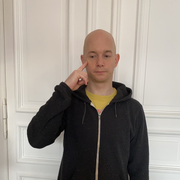

In [10]:
# Attempts resize
Kai1_path = Path('_data/_snapshots/_test/Kai/1')
Kai1_dir = os.listdir(Kai1_path)
Kai1_dir = sorted(Kai1_dir[:])
Kai1_dir = Kai1_dir[1:]

path = snapshots_path + '/_test/Kai/1/' + Kai1_dir[0]
image = Image.open(path)
box = (0, 300, 2800, 3100)
cropped_image = image.crop(box)
resized_image = cropped_image.resize((180,180), Image.ANTIALIAS)
resized_image

In [8]:
# Crop jpeg images of Cosi (1 w/ lefthand) to squares of: (0, 300, 2800, 3100)
# Resize images to: 180 x 180
path = snapshots_path + '/_test/Cosi/1L/'
box = (0, 300, 2800, 3100)

Cosi1_path = Path('_data/_snapshots/_test/Cosi/1L')
Cosi1_dir = os.listdir(Cosi1_path)
Cosi1_dir = sorted(Cosi1_dir[:])
Cosi1_dir = Cosi1_dir[1:]

for item in Cosi1_dir:
    # Crop, Resize and Save
    image = Image.open(path+item)
    cropped_image = image.crop(box)
    f, e = os.path.splitext(path+item)
    cropped_image = image.crop(box)
    resized_image = cropped_image.resize((180,180), Image.ANTIALIAS)
    resized_image.save('_data/_resized/_test/Cosi/1/' + item[:-5] + '.png', 'PNG', quality=90)

In [12]:
# Crop jpeg images of Kai (1) images to squares of: (0, 300, 2800, 3100)
# Resize images to: 180 x 180
path = snapshots_path + '/_test/Kai/1/'
box = (0, 300, 2800, 3100)

Kai1_path = Path('_data/_snapshots/_test/Kai/1')
Kai1_dir = os.listdir(Kai1_path)
Kai1_dir = sorted(Kai1_dir[:])
Kai1_dir = Kai1_dir[1:]

for item in Kai1_dir:
    # Crop, Resize and Save
    image = Image.open(path+item)
    cropped_image = image.crop(box)
    f, e = os.path.splitext(path+item)
    cropped_image = image.crop(box)
    resized_image = cropped_image.resize((180,180), Image.ANTIALIAS)
    resized_image.save('_data/_resized/_test/Kai/1/' + item[:-5] + '.png', 'PNG', quality=90)

In [39]:
# Crop jpeg images of Lea (0) images to squares of: (0, 0, 2600, 2600)
# Resize images to: 180 x 180
path = snapshots_path + '/_train/Lea/0/'
box = (0, 0, 2600, 2600)

Lea0_path = Path('_data/_snapshots/_train/Lea/0')
Lea0_dir = os.listdir(Lea0_path)
Lea0_dir = sorted(Lea0_dir[:])
Lea0_dir = Lea0_dir[1:]

for item in Lea0_dir:
    # Crop, Resize and Save
    image = Image.open(path+item)
    cropped_image = image.crop(box)
    f, e = os.path.splitext(path+item)
    cropped_image = image.crop(box)
    resized_image = cropped_image.resize((180,180), Image.ANTIALIAS)
    resized_image.save('_data/_resized/_train/Lea/0/' + item[:-5] + '.png', 'PNG', quality=90)

In [44]:
# Crop jpeg images of Sarah (0) images to squares of: (0, 300, 2600, 2900)
# Resize images to: 180 x 180
path = snapshots_path + '/_train/Sarah/0/'
box = (0, 300, 2600, 2900)

Sarah0_path = Path('_data/_snapshots/_train/Sarah/0/')
Sarah0_dir = os.listdir(Sarah0_path)
Sarah0_dir = sorted(Sarah0_dir[:])
Sarah0_dir = Sarah0_dir[1:]

for item in Sarah0_dir:
    # Crop, Resize and Save
    image = Image.open(path+item)
    cropped_image = image.crop(box)
    f, e = os.path.splitext(path+item)
    cropped_image = image.crop(box)
    resized_image = cropped_image.resize((180,180), Image.ANTIALIAS)
    resized_image.save('_data/_resized/_train/Sarah/0/' + item[:-5] + '.png', 'PNG', quality=90)

In [45]:
# Crop jpeg images of Ashlyn (0) images to squares of: (0, 300, 2600, 2900)
# Resize images to: 180 x 180
path = snapshots_path + '/_train/Ashlyn/0/'
box = (0, 300, 2600, 2900)

Ashlyn0_path = Path('_data/_snapshots/_train/Ashlyn/0/')
Ashlyn0_dir = os.listdir(Ashlyn0_path)
Ashlyn0_dir = sorted(Ashlyn0_dir[:])
Ashlyn0_dir = Ashlyn0_dir[1:]

for item in Ashlyn0_dir:  
    # Crop, Resize and Save
    image = Image.open(path+item)
    cropped_image = image.crop(box)
    f, e = os.path.splitext(path+item)
    cropped_image = image.crop(box)
    resized_image = cropped_image.resize((180,180), Image.ANTIALIAS)
    resized_image.save('_data/_resized/_train/Ashlyn/0/' + item[:-5] + '.png', 'PNG', quality=90)

In [46]:
# Crop jpeg images of Ashlyn (1) images to squares of: (0, 300, 2600, 2900)
# Resize images to: 180 x 180
path = snapshots_path + '/_train/Ashlyn/1/'
box = (0, 300, 2600, 2900)

Ashlyn1_path = Path('_data/_snapshots/_train/Ashlyn/1/')
Ashlyn1_dir = os.listdir(Ashlyn1_path)
Ashlyn1_dir = sorted(Ashlyn1_dir[:])
Ashlyn1_dir = Ashlyn1_dir[1:]

for item in Ashlyn1_dir: 
    # Crop, Resize and Save
    image = Image.open(path+item)
    cropped_image = image.crop(box)
    f, e = os.path.splitext(path+item)
    cropped_image = image.crop(box)
    resized_image = cropped_image.resize((180,180), Image.ANTIALIAS)
    resized_image.save('_data/_resized/_train/Ashlyn/1/' + item[:-5] + '.png', 'PNG', quality=90)

In [172]:
# Add _resized directory to path in lists
train_names0 = ['_resized/' + path for path in train_names0]
train_names1 = ['_resized/' + path for path in train_names1]
test_names0 = ['_resized/' + path for path in test_names0]
test_names1 = ['_resized/' + path for path in test_names1]

In [173]:
# Create label lists corresponding to file list indexes
train_labels0 = [0] * len(train_names0)
train_labels1 = [1] * len(train_names1)
test_labels0 = [0] * len(test_names0)
test_labels1 = [1] * len(test_names1)

# Merge labels to correspont to single file list indexes
train_labels = train_labels0 + train_labels1
test_labels = test_labels0 + test_labels1

In [207]:
# Merge file lists into single list
train_names = train_names0 + train_names1
test_names = test_names0 + test_names1

train = train_names, train_labels
test = test_names, test_labels

In [210]:
# Turn file lists in dataframes by column
import pandas as pd

train_df = pd.DataFrame(train)
train_df = train_df.T
train_df.columns=['image', 'label']

test_df = pd.DataFrame(test)
test_df = test_df.T
test_df.columns=['image', 'label']

In [211]:
# Export data from pipeline to csv
# train_df_bycol = pd.DataFrame(train, columns=['image', 'label'])
train_df.to_csv('train.csv', index=False)

# test_df = pd.DataFrame(test, columns=['image', 'label'])
test_df.to_csv('test.csv', index=False)

In [212]:
train_df.head()

,image,label
0,_resized/Callum/0/vlcsnap-2020-12-03-16h49m23s...,0
1,_resized/Callum/0/vlcsnap-2020-12-03-16h55m16s...,0
2,_resized/Callum/0/vlcsnap-2020-12-03-16h56m11s...,0
3,_resized/Callum/0/vlcsnap-2020-12-03-16h57m08s...,0
4,_resized/Callum/0/vlcsnap-2020-12-03-16h48m37s...,0


In [213]:
test_df.head()

,image,label
0,_resized/Amber/0/vlcsnap-2020-12-04-15h45m39s0...,0
1,_resized/Amber/0/vlcsnap-2020-12-04-15h48m22s8...,0
2,_resized/Amber/0/vlcsnap-2020-12-04-15h50m49s0...,0
3,_resized/Amber/0/vlcsnap-2020-12-04-15h50m05s6...,0
4,_resized/Amber/0/vlcsnap-2020-12-04-15h50m57s2...,0
